In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.neighbors import KDTree
from data_utils import load_dataset

In [3]:
# first, implement distance metric as separate function
def minkowski_dists(x_train, x_test_i, l=2):
    
    """
    Returns Minkowski distance between each element
    of x_train and x_test_i as a (D,1) np array
    
    x_train is a (D,n) array
    x_test_i is a (n,) array
    
    dists is a (D,1) array
    """
    
    p = l
    x_test_i = x_test_i.reshape((1,-1)) # converts x_test_i to a (1,n) array
    # not necessary... will still work w/out this b/c broadcasting
    diff = np.abs(x_train-x_test_i)
    power = np.power(diff,p)
    sigma = np.sum(power,axis=1).reshape((x_train.shape[0],-1)) # axis = 1 --> sum along rows
    dists = np.power(sigma,1/p)
    return dists

def kNN_regress(x_train, y_train, x_test, k=1, l=2):
    
    """
    Returns y_predict results corresponding to x_test inputs using kNN algorithm
    
    x_train is a (D,n) array
    y_train is a (D,1) array (regression: single output)
    x_test is a (T,n) array
    
    y_predict is a (T,1) array (regression: single output)
    """
    
    num_test_points = x_test.shape[0]
    y_predict = np.empty((num_test_points,1),)
    
    # compute distances (for each test point)
    # assume distance metric is the Minkowski distance
    for i, x_test_i in enumerate(x_test):
        dists = minkowski_dists(x_train, x_test_i,l)
        partition = np.argpartition(dists,kth=k,axis=0) # returns indices of dists
                                                        # axis = 0 --> partition along column
        kNN = partition[:k]
        y_predict[i,0] = np.average(y_train[kNN,0])
    
    return y_predict

In [31]:
def kNN_regress_kdtree(x_train, y_train, x_test, k=1, l=2):
    if l == 1:
        kd = KDTree(x_train, metrc='cityblock')
    elif l == 2:
        kd = KDTree(x_train, metric='euclidean')
    else:
        print("error")
        return

    kNN = kd.query(x_test, k=k)[1]
    y_predict = np.average(y_train[kNN, 0], axis=1).reshape(x_test.shape[0], 1)
    return y_predict

In [5]:
np.random.seed(100)

In [25]:
def runtimes(f1, f2, d, k=5, l=2, n_train=5000):
    
    x_train, x_valid, x_test, y_train, y_valid, y_test = load_dataset('rosenbrock', n_train=n_train, d=d)
    x_train = np.vstack([x_valid, x_train])
    y_train = np.vstack([y_valid, y_train])
    
    print("Running:", f1)
    t0 = time.time()
    f1(x_train, y_train, x_test, k=k, l=l)
    t1 = time.time() - t0
    print("t1 =", round(t1, 2))
    
    print("Running:", f2)
    t0 = time.time()
    f2(x_train, y_train, x_test, k=k, l=l)
    t2 = time.time() - t0
    print("t2 =", round(t2,2))
    
    return (t1, t2)

d = 10
Running: <function kNN_regress at 0x0000029BAA6DDD00>
t1 = 1.17
Running: <function kNN_regress_kdtree at 0x0000029BAD248F40>
t2 = 0.05
d = 20
Running: <function kNN_regress at 0x0000029BAA6DDD00>
t1 = 2.2
Running: <function kNN_regress_kdtree at 0x0000029BAD248F40>
t2 = 0.12
d = 30
Running: <function kNN_regress at 0x0000029BAA6DDD00>
t1 = 3.61
Running: <function kNN_regress_kdtree at 0x0000029BAD248F40>
t2 = 0.16
d = 40
Running: <function kNN_regress at 0x0000029BAA6DDD00>
t1 = 4.83
Running: <function kNN_regress_kdtree at 0x0000029BAD248F40>
t2 = 0.21
d = 50
Running: <function kNN_regress at 0x0000029BAA6DDD00>
t1 = 5.98
Running: <function kNN_regress_kdtree at 0x0000029BAD248F40>
t2 = 0.25
d = 60
Running: <function kNN_regress at 0x0000029BAA6DDD00>
t1 = 6.97
Running: <function kNN_regress_kdtree at 0x0000029BAD248F40>
t2 = 0.29
d = 70
Running: <function kNN_regress at 0x0000029BAA6DDD00>
t1 = 8.11
Running: <function kNN_regress_kdtree at 0x0000029BAD248F40>
t2 = 0.32
d = 80


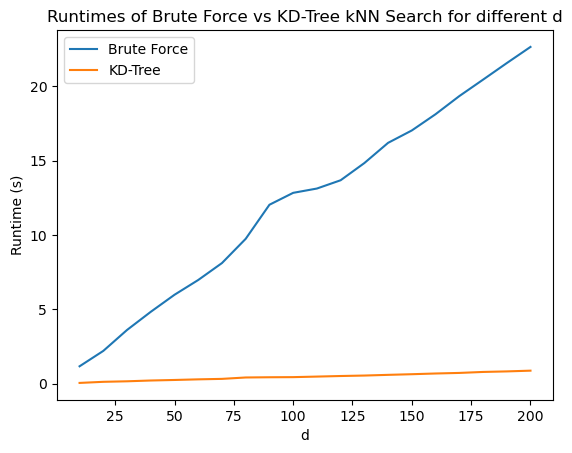

In [32]:
d_vals = 10 * (np.arange(20) + 1)
times_brute_force = np.empty(d_vals.shape[0])
times_kdtree = np.empty(d_vals.shape[0])

for i, d in enumerate(d_vals):
    print("d =", d)
    times_brute_force[i], times_kdtree[i] = runtimes(f1=kNN_regress, f2=kNN_regress_kdtree, d=d, k=5, l=2, n_train=5000)

plt.figure()
plt.title("Runtimes of Brute Force vs KD-Tree kNN Search for different d")
plt.xlabel("d")
plt.ylabel("Runtime (s)")
plt.plot(d_vals, times_brute_force, label="Brute Force")
plt.plot(d_vals, times_kdtree, label="KD-Tree")
plt.legend(loc='best')